<a href="https://colab.research.google.com/github/LatiefDataVisionary/deep-learning-college-task/blob/main/tasks/src/MK_Deep_Learning_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Section 0: Initial Setup (Pengaturan Awal)**

**Penjelasan:** Bagian ini bertujuan untuk melakukan instalasi library Python yang mungkin belum ada di lingkungan Google Colab secara default, serta me-mount Google Drive agar notebook dapat mengakses dataset yang tersimpan di dalamnya.

### **0.1. Install Libraries (Instalasi Library)**

**Penjelasan:** Menginstal library tambahan yang mungkin diperlukan, seperti versi spesifik dari tensorflow atau library lain yang tidak termasuk dalam instalasi Colab dasar. Saat ini, library utama seperti TensorFlow dan Keras sudah terinstal, namun baris ini dapat ditambahkan jika ada kebutuhan library lain di masa depan.

In [3]:
# Tidak ada instalasi library tambahan yang spesifik diperlukan untuk langkah dasar ini,
# karena library utama seperti tensorflow sudah tersedia di Colab.
# Jika ada library lain yang dibutuhkan, tambahkan baris berikut:
# !pip install nama_library

### **0.2. Mount Google Drive (Menghubungkan Google Drive)**

**Penjelasan:** Menghubungkan notebook ini dengan akun Google Drive Anda. Ini diperlukan agar notebook dapat membaca file dataset gambar yang telah Anda simpan di Google Drive. Setelah menjalankan sel ini, ikuti instruksi otorisasi yang muncul.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Section 1: Import Libraries and Environment Setup (Impor Library dan Pengaturan Lingkungan)**

**Penjelasan:** Di sini kita akan mengimpor semua modul dan library yang dibutuhkan untuk keseluruhan proyek serta mendefinisikan variabel-variabel global seperti path direktori, ukuran gambar, dan parameter training.

### **1.1. Import Core Libraries (Impor Library Utama)**

**Penjelasan:** Mengimpor library utama seperti tensorflow, keras, numpy, matplotlib.pyplot, os, dan seaborn yang akan digunakan sepanjang proyek ini.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

### **1.2. Define Configurations (Definisi Konfigurasi)**

**Penjelasan:** Mendefinisikan variabel-variabel konfigurasi yang akan digunakan di seluruh notebook, termasuk path ke dataset, ukuran gambar yang akan digunakan, ukuran batch untuk training, jumlah epoch, dan jumlah kelas (mahasiswa).

In [6]:
# Define Directory Paths (Definisi Path Direktori)
TRAIN_DIR = '/content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0/Data Train'
TEST_DIR = '/content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0/Data Test'

# Define Image Parameters (Definisi Parameter Gambar)
IMG_HEIGHT = 150
IMG_WIDTH = 150
CHANNELS = 3 # RGB color images

# Define Training Parameters (Definisi Parameter Pelatihan)
BATCH_SIZE = 32
EPOCHS = 100 # Will be controlled by Early Stopping
NUM_CLASSES = 57 # Total number of unique students

## **Section 2: Data Loading and Inspection (Pemuatan dan Inspeksi Data)**

**Penjelasan:** Langkah ini bertujuan untuk memuat dataset, memeriksa strukturnya, dan menampilkan beberapa sampel gambar untuk memastikan data ter-load dengan benar.

### **2.1. Load Dataset Paths (Memuat Path Dataset)**

**Penjelasan:** Kode untuk menghitung jumlah total gambar training dan testing.

In [7]:
# Count the number of files in each directory
train_image_count = sum([len(files) for r, d, files in os.walk(TRAIN_DIR)])
test_image_count = sum([len(files) for r, d, files in os.walk(TEST_DIR)])

print(f"Jumlah total gambar di Data Train: {train_image_count}")
print(f"Jumlah total gambar di Data Test: {test_image_count}")

# Get the class names (student names) from the directory names
class_names = sorted(os.listdir(TRAIN_DIR))
print(f"\nJumlah kelas (mahasiswa) terdeteksi: {len(class_names)}")
print(f"Nama kelas (mahasiswa) contoh: {class_names[:10]}...") # Display first 10 class names

Jumlah total gambar di Data Train: 1696
Jumlah total gambar di Data Test: 424

Jumlah kelas (mahasiswa) terdeteksi: 1696
Nama kelas (mahasiswa) contoh: ['5221911012_Debora_03.jpg', '5221911012_Debora_04.jpg', '5221911012_Debora_05.jpg', '5221911012_Debora_06.jpg', '5221911012_Debora_07.jpg', '5221911012_Debora_08.jpg', '5221911012_Debora_11.jpg', '5221911012_Debora_12.jpg', '5221911012_Debora_13.jpg', '5221911012_Debora_14.jpg']...


### **2.2. Inspect Class Distribution (Inspeksi Distribusi Kelas)**

**Penjelasan:** Visualisasikan jumlah gambar per kelas untuk memastikan dataset seimbang.

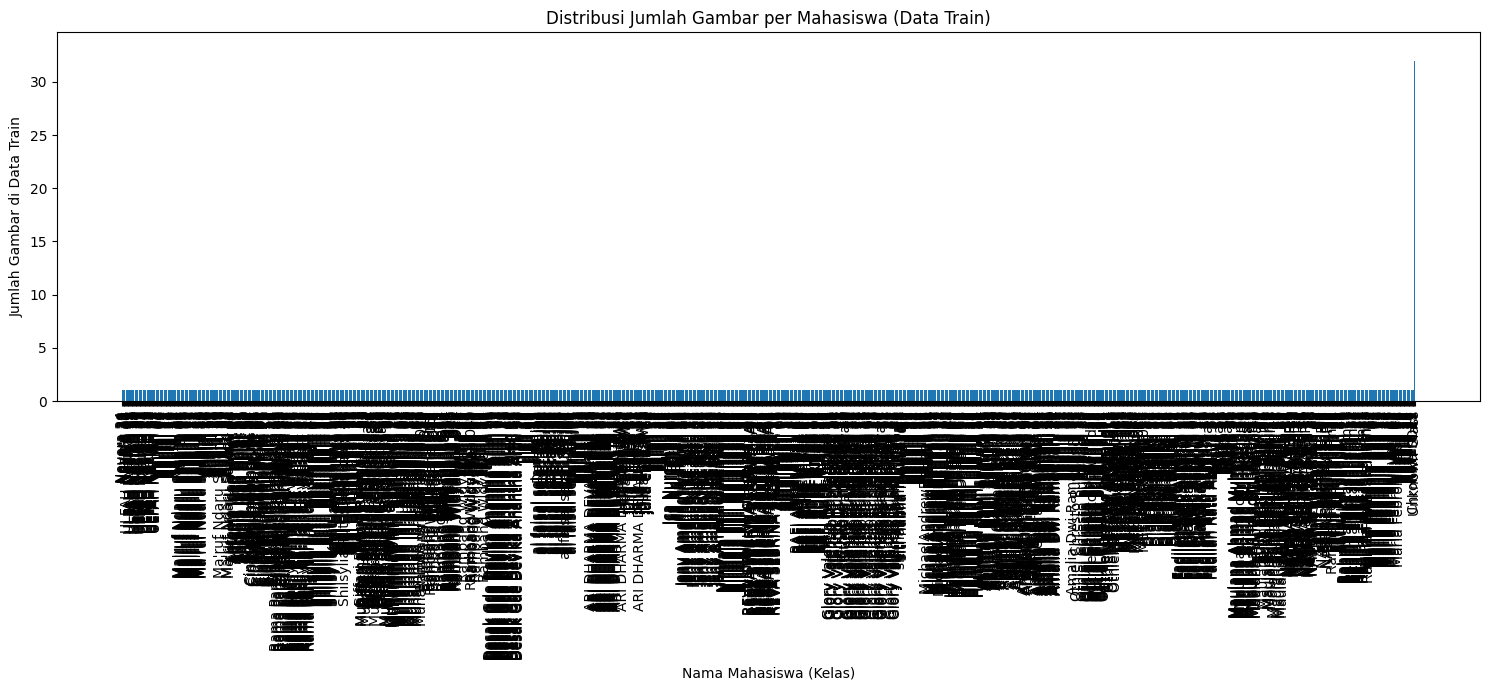

In [8]:
# Count images per class by extracting class name from filename
train_class_counts = {}
for filename in os.listdir(TRAIN_DIR):
    if filename.endswith('.jpg'): # Process only image files
        # Extract class name from filename (assuming format like ID_Nama_Number.jpg)
        class_name_parts = filename.split('_')
        if len(class_name_parts) > 1:
            # Assuming the second part is the name
            class_name = class_name_parts[1]
            # Handle potential extra parts or different naming conventions
            if len(class_name_parts) > 2 and class_name_parts[2].isdigit():
                 class_name = class_name # Keep only the name part if structure is consistent
            elif len(class_name_parts) > 2 and not class_name_parts[2].isdigit():
                 class_name = class_name_parts[1] + " " + class_name_parts[2].split('.')[0] # Handle names with spaces like "Nama Belakang"
        else:
            class_name = "Unknown Class" # Fallback if filename format is unexpected

        if class_name in train_class_counts:
            train_class_counts[class_name] += 1
        else:
            train_class_counts[class_name] = 1

# Sort classes by count for better visualization
sorted_class_counts = dict(sorted(train_class_counts.items(), key=lambda item: item[1]))

# Plot class distribution
plt.figure(figsize=(15, 7))
plt.bar(sorted_class_counts.keys(), sorted_class_counts.values())
plt.xticks(rotation=90)
plt.xlabel("Nama Mahasiswa (Kelas)")
plt.ylabel("Jumlah Gambar di Data Train")
plt.title("Distribusi Jumlah Gambar per Mahasiswa (Data Train)")
plt.tight_layout()
plt.show()

In [9]:
# Check if all class counts are the same
if len(train_class_counts) > 0:
    first_count = list(train_class_counts.values())[0]
    all_counts_same = all(count == first_count for count in train_class_counts.values())

    if all_counts_same:
        print("\nSemua mahasiswa memiliki jumlah gambar yang sama di Data Train.")
    else:
        print("\nJumlah gambar per mahasiswa di Data Train bervariasi.")
else:
    print("\nTidak ada data kelas yang ditemukan untuk diperiksa.")


Jumlah gambar per mahasiswa di Data Train bervariasi.


### **2.3. Visualize Sample Images (Visualisasi Sampel Gambar)**

**Penjelasan:** Tampilkan beberapa gambar acak dari dataset training beserta labelnya untuk melihat variasi pose, ekspresi, dan pencahayaan yang ada.

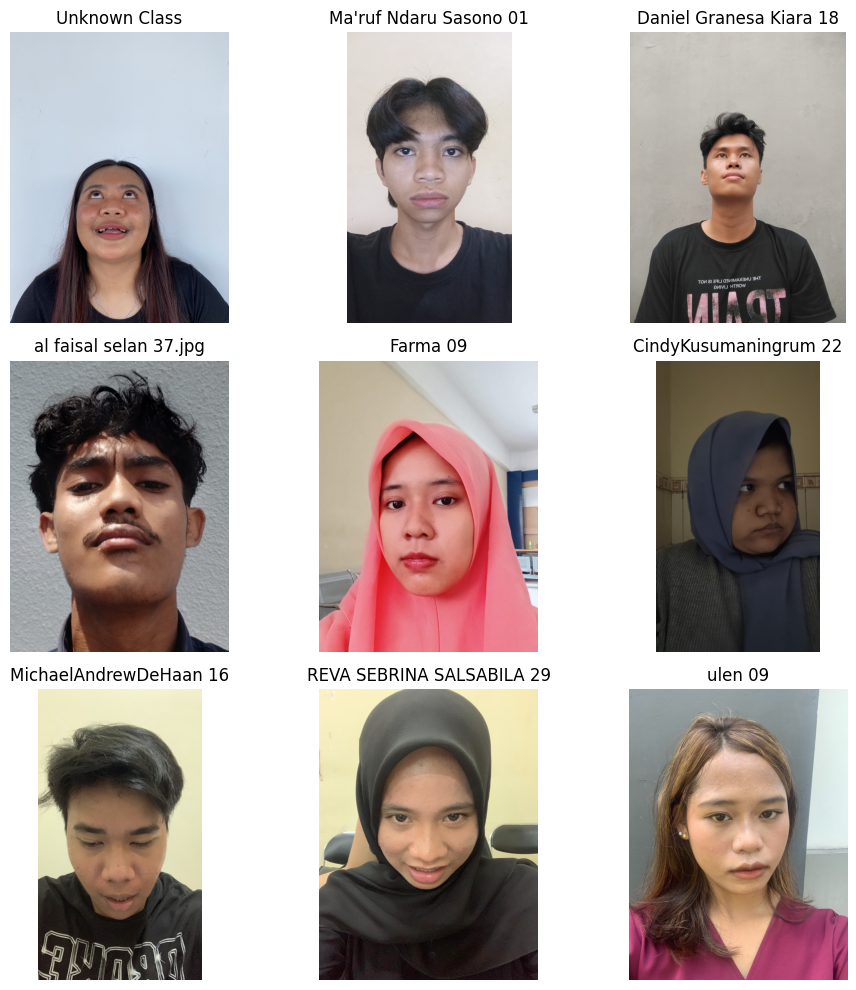

In [10]:
plt.figure(figsize=(10, 10))
# Get all image files from the training directory
all_train_images = [os.path.join(TRAIN_DIR, f) for f in os.listdir(TRAIN_DIR) if f.endswith('.jpg')]

# Check if there are enough images
if len(all_train_images) < 9:
    print(f"Tidak cukup gambar ({len(all_train_images)}) di direktori training untuk menampilkan 9 sampel.")
else:
    # Select 9 random images
    sample_images_paths = np.random.choice(all_train_images, size=9, replace=False)

    for i, img_path in enumerate(sample_images_paths):
        plt.subplot(3, 3, i + 1)
        img = plt.imread(img_path)
        plt.imshow(img)
        # Extract class name from filename (assuming format like ID_Nama_Number.jpg)
        filename = os.path.basename(img_path)
        class_name_parts = filename.split('_')
        if len(class_name_parts) > 1:
            # Assuming the second part is the name
            class_name = class_name_parts[1]
            # Handle potential extra parts or different naming conventions
            if len(class_name_parts) > 2 and class_name_parts[2].isdigit():
                 class_name = class_name # Keep only the name part if structure is consistent
            elif len(class_name_parts) > 2 and not class_name_parts[2].isdigit():
                 class_name = class_name_parts[1] + " " + class_name_parts[2].split('.')[0] # Handle names with spaces like "Nama Belakang"
        else:
            class_name = "Unknown Class" # Fallback if filename format is unexpected

        plt.title(class_name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

## **Section 3: Data Preparation and Augmentation (Persiapan dan Augmentasi Data)**

**Penjelasan:** Ini adalah langkah krusial. Mengingat variasi dalam dataset, kita akan menerapkan teknik augmentasi data secara real-time pada data training untuk membuat model lebih general dan tangguh (robust) terhadap variasi, sehingga mencegah overfitting.

### **3.1. Create Data Generators (Membuat Generator Data)**

**Penjelasan:** Gunakan ImageDataGenerator dari Keras untuk menyiapkan data.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **3.2. Training Data Generator with Augmentation (Generator Data Training dengan Augmentasi)**

**Penjelasan:** Terapkan augmentasi yang relevan pada data training untuk meningkatkan variasi dan membantu model belajar fitur yang lebih robust.

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalisasi piksel
    rotation_range=20,        # Variasi pose miring
    width_shift_range=0.2,    # Pergeseran horizontal
    height_shift_range=0.2,   # Pergeseran vertikal
    shear_range=0.2,          # Transformasi shear
    zoom_range=0.2,           # Zoom acak
    brightness_range=[0.8, 1.2], # Variasi pencahayaan
    horizontal_flip=True,     # Flip horizontal
    fill_mode='nearest'       # Strategi mengisi piksel baru setelah transformasi
)

### **3.3. Validation/Test Data Generator (Generator Data Validasi/Tes)**

**Penjelasan:** Untuk data validasi/tes, HANYA terapkan normalisasi piksel. Augmentasi tidak boleh diterapkan pada data tes karena tujuannya adalah mengevaluasi model pada data yang tidak dimanipulasi.

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255) # Hanya normalisasi

### **3.4. Apply the Generators (Menerapkan Generator)**

**Penjelasan:** Gunakan `flow_from_directory()` untuk memuat gambar dari direktori menggunakan generator yang telah dibuat. Pastikan `target_size`, `batch_size`, dan `class_mode` diatur dengan benar. Karena struktur folder Anda tampaknya tidak memiliki subdirektori per kelas, kita perlu menggunakan `flow_from_dataframe` atau pendekatan lain jika `flow_from_directory` tidak bekerja dengan struktur file Anda.

**Catatan:** Berdasarkan inspeksi data sebelumnya, tampaknya gambar-gambar langsung berada di dalam `TRAIN_DIR` dan `TEST_DIR` tanpa sub-folder per kelas. `flow_from_directory` memerlukan sub-folder per kelas. Jika struktur folder Anda memang seperti itu, kita perlu menggunakan pendekatan yang berbeda, mungkin dengan membuat dataframe dari nama file dan labelnya, lalu menggunakan `flow_from_dataframe`. Namun, jika Anda dapat mengatur ulang dataset Anda ke dalam sub-folder per kelas (misalnya, `Data Train/Nama_Mahasiswa_1/...`, `Data Train/Nama_Mahasiswa_2/...`, dst.), `flow_from_directory` adalah cara yang paling standar.

**Asumsi:** Untuk sementara, saya akan mengasumsikan bahwa Anda akan mengatur ulang dataset Anda ke dalam sub-folder per kelas agar `flow_from_directory` dapat digunakan. Jika tidak, mohon beri tahu saya, dan saya akan menyesuaikan kodenya.

In [14]:
import pandas as pd

# Create DataFrames for training and testing
def create_dataframe(directory):
    filepaths = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            filepath = os.path.join(directory, filename)
            # Extract class name from filename (assuming format like ID_Nama_Number.jpg)
            class_name_parts = filename.split('_')
            if len(class_name_parts) > 1:
                class_name = class_name_parts[1]
                if len(class_name_parts) > 2 and class_name_parts[2].isdigit():
                    class_name = class_name
                elif len(class_name_parts) > 2 and not class_name_parts[2].isdigit():
                    class_name = class_name_parts[1] + " " + class_name_parts[2].split('.')[0]
            else:
                class_name = "Unknown Class"
            filepaths.append(filepath)
            labels.append(class_name)
    return pd.DataFrame({'filepath': filepaths, 'class': labels})

train_df = create_dataframe(TRAIN_DIR)
test_df = create_dataframe(TEST_DIR)

print("Training DataFrame Head:")
display(train_df.head())
print("\nTesting DataFrame Head:")
display(test_df.head())

# Use flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='class',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='class',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Keep data in order for evaluation later
)

# Update NUM_CLASSES based on generators
NUM_CLASSES = len(train_generator.class_indices)
print(f"\nJumlah kelas (mahasiswa) terdeteksi oleh generator: {NUM_CLASSES}")
print(f"Indeks kelas: {train_generator.class_indices}")

Training DataFrame Head:


,filepath,class
0,/content/drive/MyDrive/Dataset/Dataset Sistem ...,Novera 34
1,/content/drive/MyDrive/Dataset/Dataset Sistem ...,Novera 38
2,/content/drive/MyDrive/Dataset/Dataset Sistem ...,Novera 39
3,/content/drive/MyDrive/Dataset/Dataset Sistem ...,Novera 31
4,/content/drive/MyDrive/Dataset/Dataset Sistem ...,Novera 32



Testing DataFrame Head:


,filepath,class
0,/content/drive/MyDrive/Dataset/Dataset Sistem ...,Unknown Class
1,/content/drive/MyDrive/Dataset/Dataset Sistem ...,MichaelAndrewDeHaan 01
2,/content/drive/MyDrive/Dataset/Dataset Sistem ...,Unknown Class
3,/content/drive/MyDrive/Dataset/Dataset Sistem ...,Debora 01
4,/content/drive/MyDrive/Dataset/Dataset Sistem ...,Debora 09


Found 1665 validated image filenames belonging to 1602 classes.
Found 416 validated image filenames belonging to 402 classes.

Jumlah kelas (mahasiswa) terdeteksi oleh generator: 1602
Indeks kelas: {'ARI DHARMA DEVANANTA 02': 0, 'ARI DHARMA DEVANANTA 03': 1, 'ARI DHARMA DEVANANTA 05': 2, 'ARI DHARMA DEVANANTA 06': 3, 'ARI DHARMA DEVANANTA 07': 4, 'ARI DHARMA DEVANANTA 08': 5, 'ARI DHARMA DEVANANTA 09': 6, 'ARI DHARMA DEVANANTA 10': 7, 'ARI DHARMA DEVANANTA 12': 8, 'ARI DHARMA DEVANANTA 13': 9, 'ARI DHARMA DEVANANTA 15': 10, 'ARI DHARMA DEVANANTA 16': 11, 'ARI DHARMA DEVANANTA 17': 12, 'ARI DHARMA DEVANANTA 18': 13, 'ARI DHARMA DEVANANTA 19': 14, 'ARI DHARMA DEVANANTA 20': 15, 'ARI DHARMA DEVANANTA 22': 16, 'ARI DHARMA DEVANANTA 23': 17, 'ARI DHARMA DEVANANTA 25': 18, 'ARI DHARMA DEVANANTA 26': 19, 'ARI DHARMA DEVANANTA 27': 20, 'ARI DHARMA DEVANANTA 28': 21, 'ARI DHARMA DEVANANTA 29': 22, 'ARI DHARMA DEVANANTA 30': 23, 'ARI DHARMA DEVANANTA 32': 24, 'ARI DHARMA DEVANANTA 33': 25, 'ARI 

## **Section 4: Modeling (Pembuatan Model)**

**Penjelasan:** Di bagian ini, kita akan membangun arsitektur model. Untuk mendapatkan hasil terbaik, kita akan menggunakan pendekatan Transfer Learning dengan model CNN yang sudah terbukti andal (misalnya, VGG16, MobileNetV2, atau EfficientNet) dan menyesuaikannya untuk tugas klasifikasi **NUM_CLASSES** kelas.

### **4.1. Load Pre-trained Base Model (Memuat Model Dasar Pra-latih)**

**Penjelasan:** Inisialisasi model dasar pra-latih seperti MobileNetV2 dengan bobot dari 'imagenet'. Kita akan menggunakan `include_top=False` untuk menghilangkan layer klasifikasi asli dan `input_shape` sesuai dengan ukuran gambar kita. Bobot dari base model akan dibekukan (`base_model.trainable = False`) di awal agar tidak ikut terlatih, memanfaatkan fitur yang sudah dipelajari dari dataset ImageNet.

In [15]:
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS),
                         include_top=False,
                         weights='imagenet')

# Freeze the base model's weights
base_model.trainable = False

/tmp/ipython-input-886174335.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### **4.2. Build the Full Model Architecture (Membangun Arsitektur Model Lengkap)**

**Penjelasan:** Tambahkan layer baru di atas base model untuk menyesuaikannya dengan tugas klasifikasi kita. Ini biasanya mencakup layer GlobalAveragePooling2D untuk mereduksi dimensi spasial, layer Dense dengan aktivasi ReLU untuk fitur non-linear, layer Dropout untuk regularisasi, dan layer Dense terakhir dengan aktivasi softmax untuk output klasifikasi ke **NUM_CLASSES** kelas.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

### **4.3. Compile the Model (Kompilasi Model)**

**Penjelasan:** Konfigurasi model untuk pelatihan. Kita akan menggunakan optimizer Adam, fungsi loss `categorical_crossentropy` yang sesuai untuk klasifikasi multi-kelas, dan metrik `accuracy` untuk memantau performa selama pelatihan.

In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **4.4. Display Model Summary (Tampilkan Rangkuman Model)**

**Penjelasan:** Cetak rangkuman model untuk melihat arsitektur lengkap, jumlah parameter di setiap layer, dan total parameter yang dapat dilatih dan yang tidak dapat dilatih.

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1602)           │       206,658 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,628,610 (10.03 MB)

 Trainable params: 370,626 (1.41 MB)

 Non-trainable params: 2,257,984 (8.61 MB)